In [1]:
import pyreadr
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import pearsonr
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# import data, access pandas df via key "None"
X_Govaere = pyreadr.read_r("datasets/X_Govaere.rds")[None]
X_Hoang = pyreadr.read_r("datasets/X_Hoang.rds")[None]
X_Pantano = pyreadr.read_r("datasets/X_Pantano.rds")[None]

# actual, clinical results
Y_Govaere = pyreadr.read_r("datasets/Y_Govaere.rds")[None]
Y_Hoang = pyreadr.read_r("datasets/Y_Hoang.rds")[None]
Y_Pantano = pyreadr.read_r("datasets/Y_Pantano.rds")[None]

# viper metric, predicted results
Y_viper_Govaere = pyreadr.read_r("datasets/viper_X_Govaere.rds")[None]
Y_viper_Hoang = pyreadr.read_r("datasets/viper_X_Hoang.rds")[None]
Y_viper_Pantano = pyreadr.read_r("datasets/viper_X_Pantano.rds")[None]

# in vitro dataset
metadata = pd.read_csv("datasets/MPS/metadata_MPS.csv")
X_MPS = pd.read_csv("datasets/MPS/X_MPS.csv", index_col=0) # genes on the columns, samples on the rows
Y_viper_MPS = pyreadr.read_r("datasets/MPS/Y_viper_MPS.rds")[None]

In [9]:
Y_viper_Govaere

,statistic,source,condition,score,p_value
0,viper,Fibrosis stage,GSM3998167,-2.793241,5.218273e-03
1,viper,Fibrosis stage,GSM3998168,2.474362,1.334745e-02
2,viper,Fibrosis stage,GSM3998169,2.580804,9.857063e-03
3,viper,Fibrosis stage,GSM3998171,-1.606168,1.082370e-01
4,viper,Fibrosis stage,GSM3998172,2.173889,2.971348e-02
...,...,...,...,...,...
383,viper,NAS,GSM3998378,4.336112,1.450251e-05
384,viper,NAS,GSM3998379,5.013249,5.351846e-07
385,viper,NAS,GSM3998380,-1.149269,2.504452e-01
386,viper,NAS,GSM3998381,0.056556,9.548990e-01


In [23]:
Y_Govaere

,NAS,fibrosis
0,4,2
1,7,3
2,7,2
3,5,0
4,5,1
...,...,...
189,6,3
190,7,3
191,3,1
192,5,2


In [19]:
Y_viper_Govaere

source,Fibrosis stage,NAS
GSM3998167,-2.793241,0.426990
GSM3998168,2.474362,3.668549
GSM3998169,2.580804,5.718936
GSM3998171,-1.606168,2.064742
GSM3998172,2.173889,0.286236
...,...,...
GSM3998378,4.819992,4.336112
GSM3998379,3.786464,5.013249
GSM3998380,-0.830239,-1.149269
GSM3998381,2.778130,0.056556


In [18]:
# Y_viper_Govaere = Y_viper_Govaere.loc[:,['source', 'condition','score']].pivot(index="condition", columns="source", values="score")
Y_viper_Govaere = Y_viper_Govaere.loc[X_Govaere.index, :] # reorders the rows of Y_viper_MPS to match the rows of Y_hat_MPS

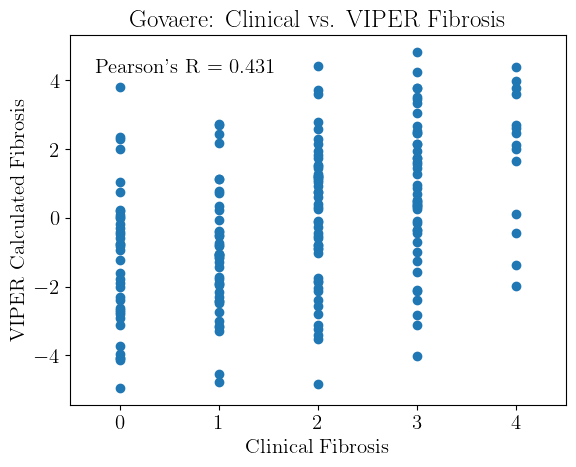

In [26]:
# Use LaTeX for graphs' text
plt.rc('text', usetex=True)
# Use the serif font
plt.rc('font', family='serif')
ax = plt.axes()

scatterNAS = ax.scatter(Y_Govaere["fibrosis"], Y_viper_Govaere["Fibrosis stage"])
ax.set_xlabel("Clinical Fibrosis")
ax.set_ylabel("VIPER Calculated Fibrosis")
ax.set_title("Govaere: Clinical vs. VIPER Fibrosis")
plt.rcParams.update({'font.size': 15})

ax.set_xlim(-.5, 4.5) # show all possible NAS values
ax.annotate("Pearson's R = {:.3f}".format(pearsonr(Y_Govaere["fibrosis"], Y_viper_Govaere["Fibrosis stage"])[0]), xy=(0.05, 0.9), xycoords='axes fraction')
plt.savefig(f'graphs/Govaere_Fib_score_correlation.png', dpi=200)

plt.show()